In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from IPython.display import Image, clear_output

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
from data_info import *
from preprocessing_helpers import *
from datetime import datetime
%matplotlib inline
pd.set_option("display.precision", 2)
tf.random.set_seed(42)

In [4]:
new_iq_norm = [
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k',
    'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k',
    'reanalysis_specific_humidity_g_per_kg',
    'station_max_temp_c',
    'station_min_temp_c'
]
new_iq_scale = [
                 'weekofyear',
                 'year',
]

extra_iq_cols = [
]
new_sj_norm = [
                'reanalysis_dew_point_temp_k',
                'reanalysis_min_air_temp_k',
                'reanalysis_relative_humidity_percent',
                'reanalysis_specific_humidity_g_per_kg',
]
new_sj_scale = [
                 'weekofyear',
                 'year',
]

extra_sj_cols = [
]
new_iq_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_iq_cols_no_label = CATEGORICAL_COLUMNS + new_iq_norm + new_iq_scale + extra_iq_cols + [DATETIME_COLUMN]
new_sj_cols = [LABEL_COLUMN] + CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]
new_sj_cols_no_label = CATEGORICAL_COLUMNS + new_sj_norm + new_sj_scale + extra_sj_cols + [DATETIME_COLUMN]


sj_col_size = {
    'precipitation_amt_mm': 40,
    'reanalysis_air_temp_k': 16,
    'reanalysis_avg_temp_k': 15,
    'reanalysis_dew_point_temp_k': 39,
    'reanalysis_max_air_temp_k': 12,
    'reanalysis_min_air_temp_k': 21,
    'reanalysis_precip_amt_kg_per_m2': 30,
    'reanalysis_relative_humidity_percent': 34,
    'reanalysis_sat_precip_amt_mm': 40,
    'reanalysis_specific_humidity_g_per_kg': 14,
    'reanalysis_tdtr_k': 21,
    'station_avg_temp_c': 41,
    'station_diur_temp_rng_c': 40,
    'station_max_temp_c': 37,
    'station_min_temp_c': 26,
    'station_precip_mm': 32,
    'weekofyear': 1,
    'year': 1
}
iq_col_size = {
    'precipitation_amt_mm': 33,
    'reanalysis_air_temp_k': 10,
    'reanalysis_avg_temp_k': 4,
    'reanalysis_dew_point_temp_k': 6,
    'reanalysis_max_air_temp_k': 41,
    'reanalysis_min_air_temp_k': 40,
    'reanalysis_precip_amt_kg_per_m2': 3,
    'reanalysis_relative_humidity_percent': 7,
    'reanalysis_sat_precip_amt_mm': 33,
    'reanalysis_specific_humidity_g_per_kg': 26,
    'reanalysis_tdtr_k': 34,
    'station_avg_temp_c': 40,
    'station_diur_temp_rng_c': 26,
    'station_max_temp_c': 39,
    'station_min_temp_c': 25,
    'station_precip_mm':10,
    'weekofyear': 1,
    'year': 1
}

In [5]:
sj_datasets, sj_norm_scale, sj_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_sj_cols, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale,
    extra_columns=extra_sj_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
sj_train_x, sj_train_y = sj_datasets[0]
sj_train_x = np.array(sj_train_x)
sj_train_y = np.array(sj_train_y)
iq_datasets, iq_norm_scale, iq_columns = generate_lstm_data(
    train_file, 
    single_step=True, 
    history_size=52, 
    cols=new_iq_cols, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale,
    extra_columns=extra_iq_cols,
    prepend_with_file=train_file,
    train_frac=1.0,
    group_by_column=True
)
iq_train_x, iq_train_y = iq_datasets[1]
iq_train_x = np.array(iq_train_x)
iq_train_y = np.array(iq_train_y)
sj_columns

['reanalysis_dew_point_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'weekofyear',
 'year']

In [6]:
sj_train_x[53][0]

array([-1.70740217, -0.72849212,  0.21584676,  0.13669697,  0.4623938 ,
        0.48149893,  0.4905966 ,  0.91454835,  0.81720321,  0.99096884,
        0.60249803,  0.78900041,  0.55064127,  0.68619666,  0.91545812,
        1.23569635,  1.0400963 ,  1.22386937,  0.65071572,  1.3357708 ,
        0.85086461,  0.59431012,  0.99915675,  1.16746377,  0.92273626,
        0.73987295,  0.91636789,  0.93547301,  0.37687564,  0.17854628,
       -0.18081196, -0.19900732, -1.9685055 , -0.34184084, -1.90391199,
       -2.0303697 , -1.1542634 , -1.07147454, -1.72741706, -1.60641795,
       -1.2388718 , -1.351683  , -0.93228008, -1.07511361, -0.99596382,
       -1.120602  , -1.17245876, -0.86313774, -1.66555285, -0.94228753,
       -1.86297244, -0.67936466])

In [7]:
sj_train_x[53][0][-5:]

array([-0.86313774, -1.66555285, -0.94228753, -1.86297244, -0.67936466])

In [8]:
sj_train_y[53]

16.0

In [9]:
trimed_sj_x = []
trimed_iq_x = []

def trim_data(data, columns, size_cols):
    trimed_data = []
    for row_i in range(data.shape[0]):
        new_row = []
        for col_i, col in enumerate(columns):
            new_row = np.concatenate((new_row, data[row_i][col_i][-size_cols[col]:]), axis=None)

        trimed_data.append(new_row)
    return np.array(trimed_data)
    
trimed_sj_x = trim_data(sj_train_x, sj_columns, sj_col_size)
trimed_iq_x = trim_data(iq_train_x, iq_columns, iq_col_size)

print(trimed_sj_x.shape)
print(trimed_iq_x.shape)

(936, 110)
(520, 193)


In [10]:
BATCH_SIZE = 16
BUFFER_SIZE = 500
train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat(10)

# val_sj_data_single = tf.data.Dataset.from_tensor_slices((sj_val_x, sj_val_y))
# val_sj_data_single = val_sj_data_single.batch(BATCH_SIZE).repeat()

In [11]:
# Build network with 
def build_model(optimizer = None, nodes=256, input_shape=trimed_sj_x.shape[-1]):
  model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(nodes, activation='selu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(nodes/4, activation='selu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(nodes, activation='selu'),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
  ])

  if not optimizer:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.9999, amsgrad=False)

  model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [20]:
log_dir="logs/fit/13mae" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# create model
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.01, nesterov=False, name='SGD')


# Train the Model.
EVALUATION_INTERVAL = 200
EPOCHS = 50

# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-6, verbose=1,
                                                     mode="max")

train_sj_data_single = tf.data.Dataset.from_tensor_slices((trimed_sj_x, sj_train_y))
train_sj_data_single = train_sj_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
sj_model = build_model(optimizer=opt, nodes=80)
history = sj_model.fit(
    train_sj_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/50
200/200 [==============================] - 1s 7ms/step - loss: 22.8449 - mae: 22.7727 - mse: 2613.6389
Epoch 2/50
200/200 [==============================] - 1s 6ms/step - loss: 21.0203 - mae: 21.1175 - mse: 2464.2942
Epoch 3/50
200/200 [==============================] - 1s 6ms/step - loss: 20.5781 - mae: 20.5588 - mse: 2335.4260
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 19.6838 - mae: 19.7495 - mse: 2236.6670
Epoch 5/50
200/200 [==============================] - 1s 6ms/step - loss: 19.2762 - mae: 19.2496 - mse: 2031.1874
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 18.6853 - mae: 18.6174 - mse: 1856.4915
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 17.4196 - mae: 17.3659 - mse: 1479.0792
Epoch 8/50
200/200 [==============================] - 1s 6ms/step - loss: 16.4753 - mae: 16.4714 - mse: 1030.9010
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - 

In [21]:
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

EPOCHS = 4
# opt = tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.9999, amsgrad=False)
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop'
)
iq_model = build_model(optimizer=opt, nodes=100, input_shape=trimed_iq_x.shape[-1])
train_iq_data_single = tf.data.Dataset.from_tensor_slices((trimed_iq_x, iq_train_y))
train_iq_data_single = train_iq_data_single.cache().batch(BATCH_SIZE).repeat()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="mae", factor=0.8, patience=10, min_lr=1e-6, verbose=1,
                                                     mode="max")
history = iq_model.fit(
    train_iq_data_single,
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL,
    verbose=1,
    callbacks=[tensorboard_callback, reduce_lr])

Train for 200 steps
Epoch 1/4
200/200 [==============================] - 2s 8ms/step - loss: 6.0674 - mae: 6.1260 - mse: 120.8641
Epoch 2/4
200/200 [==============================] - 1s 6ms/step - loss: 5.7483 - mae: 5.8024 - mse: 116.2971
Epoch 3/4
200/200 [==============================] - 1s 6ms/step - loss: 5.5916 - mae: 5.6446 - mse: 114.7845
Epoch 4/4
200/200 [==============================] - 1s 6ms/step - loss: 5.6265 - mae: 5.6764 - mse: 116.4221


In [22]:
file = train_file
file = test_file

org_sj_test_data, test_scale, sj_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_sj_cols_no_label, 
    norm_cols=new_sj_norm, 
    scale_cols=new_sj_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=sj_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_sj_cols,
    group_by_column=True
)
org_iq_test_data, test_scale, iq_columns = generate_lstm_data(
    file, history_size=52, 
    cols=new_iq_cols_no_label, 
    norm_cols=new_iq_norm, 
    scale_cols=new_iq_scale, 
    single_step=True, 
    train_frac=1.0, train_scale=iq_norm_scale, 
    prepend_with_file=train_file,
    extra_columns=extra_iq_cols,
    group_by_column=True
)
sj_test_x, sj_test_y = org_sj_test_data[0]
sj_test_x = np.array(sj_test_x)
sj_test_y = np.array(sj_test_y)
iq_test_x, iq_test_y = org_iq_test_data[1]
iq_test_x = np.array(iq_test_x)
iq_test_y = np.array(iq_test_y)
trimed_test_sj_x = trim_data(sj_test_x, sj_columns, sj_col_size)
trimed_test_iq_x = trim_data(iq_test_x, iq_columns, iq_col_size)
sj_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_sj_x, sj_test_y)).batch(len(sj_test_y))
print(trimed_test_sj_x.shape)

sj_pred = []
for x, y in sj_test_set.take(1):
    predictions = sj_model.predict(x)
    sj_pred = predictions.flatten()
    print(len(predictions.flatten()))

(260, 110)
260


In [23]:
iq_test_set = tf.data.Dataset.from_tensor_slices((trimed_test_iq_x, iq_test_y)).batch(len(iq_test_y))
iq_pred = []
for x, y in iq_test_set.take(1):
    predictions = iq_model.predict(x)
    iq_pred = predictions.flatten()
    print(len(predictions.flatten()))

156


In [24]:
from preprocessing_helpers import export_test_to_csv
preds = np.concatenate((sj_pred, iq_pred), axis=None)
export_test_to_csv(predictions=preds,path=file, prefix='test' if file == test_file else 'train')

416
asas


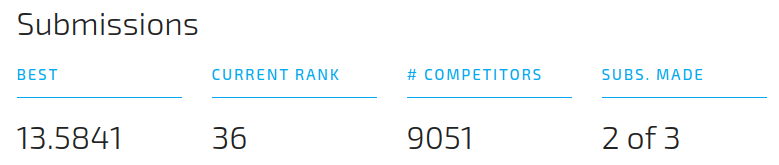

In [29]:
#Current Ranking (baseline)
Image("img/current-27-05b.png")

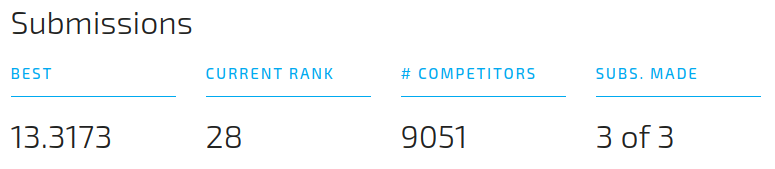

In [7]:
#Second score
Image("img/current-27-05c.png")

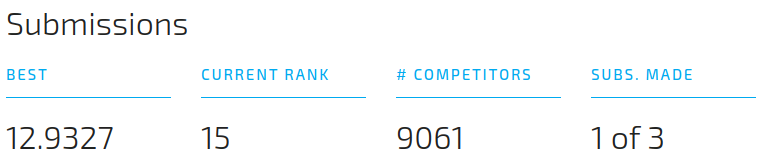

In [3]:
#Second score
Image("img/current-31-05.png")

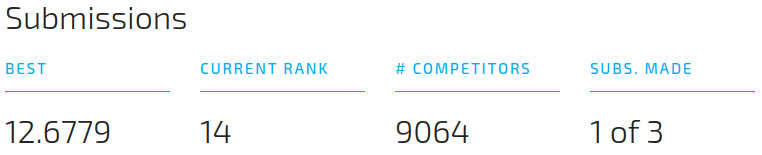

In [4]:
#Second score
Image("img/current-01-06.png")

In [15]:
# Tensorboard
# https://tensorboard.dev/experiment/rsdMubj0S165iOdLmbd13A/#scalars

In [49]:
# sj_model.save('models/sj_model_17.57MAP.h5') 
# iq_model.save('models/iq_model_17.57MAP.h5') 